<a href="https://colab.research.google.com/github/UiJungYang/5060/blob/main/5060%ED%96%89%EB%B3%B5%EA%B0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df0 = pd.read_excel("5060's 행복감.xlsx", sheet_name=0) # sheet_name 옵션을 지정하면 지정된 시트만 가지고 옴
df1 = pd.read_excel("5060's 행복감.xlsx", sheet_name=1)
df2 = pd.read_excel("5060's 행복감.xlsx", sheet_name=2)

In [ ]:
df0 = df0.replace([110,140,170,200,215,230,260,290,305,320,350,380,410,440,470,500,530,545,560,590,620,650,680,710,740],['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구'])
df1 = df1.replace([110,140,170,200,215,230,260,290,305,320,350,380,410,440,470,500,530,545,560,590,620,650,680,710,740],['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구'])
df2 = df2.replace([110,140,170,200,215,230,260,290,305,320,350,380,410,440,470,500,530,545,560,590,620,650,680,710,740],['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구'])

In [ ]:
df0_mean = df0.groupby(['지역구'], as_index=False).mean(numeric_only=True)
columns = df0_mean.columns  # 'columns' 속성에 접근하여 column 이름들을 가져옴

df1_mean = df1.groupby(['지역구'], as_index=False).mean(numeric_only=True)
columns = df1_mean.columns  # 'columns' 속성에 접근하여 column 이름들을 가져옴

df2_mean = df2.groupby(['지역구'], as_index=False).mean(numeric_only=True)
columns = df2_mean.columns  # 'columns' 속성에 접근하여 column 이름들을 가져옴

In [ ]:
df0_df1_mean = pd.merge(df0_mean, df1_mean, how='inner', on='지역구')
raw_df = pd.merge(df0_df1_mean, df2_mean, how='inner', on=None)

In [ ]:
### 변수의 값을 평균 0, 표준편차 1을 따르는 정규분포를 따르는 '표준화' 실시 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# '구_encoded' 컬럼 제외하고 표준화
columns_to_standardize = raw_df.columns.difference(['지역구'])
scaler = StandardScaler()
df = scaler.fit_transform(raw_df[columns_to_standardize])

# 표준화된 데이터를 데이터프레임으로 변환
df = pd.DataFrame(df, columns=columns_to_standardize)

# '구_encoded' 컬럼 추가
df['지역구'] = raw_df['지역구']

df

,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계",지역구
0,-0.346314,-0.714710,-0.638162,0.575738,-0.249035,0.647739,-0.148832,1.703885,0.865938,강남구
1,0.567785,0.400964,0.260612,-0.524947,0.032038,0.987652,-0.008509,-1.076809,0.393790,강동구
2,-1.912160,-1.458949,-1.543326,3.247199,2.341805,1.707038,2.021799,1.027401,1.946716,강북구
3,1.007684,0.945380,-0.177911,-0.819685,-0.948366,-1.096509,-1.433203,-1.382759,-1.231984,강서구
4,1.291651,0.049994,1.454503,-0.130417,1.129770,0.243829,0.697259,0.609078,0.434618,관악구
5,0.166631,-0.265547,1.096206,0.257083,1.515492,1.023221,0.949043,0.623203,0.708252,광진구
6,-2.110805,-1.998353,0.330428,0.063566,0.099434,-0.625588,1.173480,-0.693038,0.632202,구로구
7,-0.151327,-1.107558,0.316757,-1.413852,-1.339982,-2.169669,-1.842038,-1.966484,-0.527804,금천구
8,0.281994,0.684004,1.281176,0.009774,-0.271089,0.308881,-0.598406,0.020452,-0.202879,노원구
9,-1.690935,-1.932043,-1.189655,-0.205779,-0.211024,-0.414280,-1.208454,-0.548410,-0.586505,도봉구


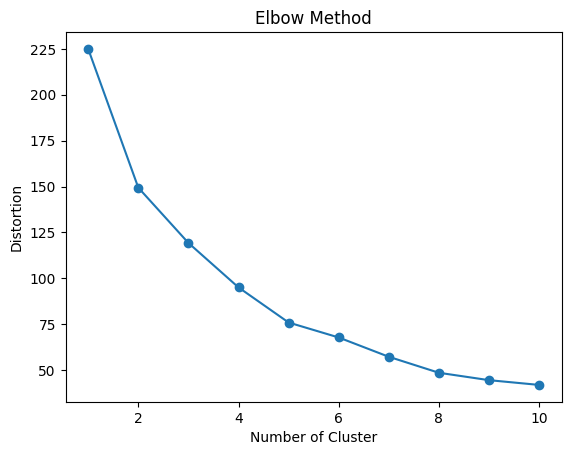

In [ ]:
# 최적의 클러스터링 갯수 찾기 - 엘보우 기법
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df.iloc[:, 0:9].select_dtypes(include='number')

def visualize_elbowmethod(df, param_init='random', param_n_init=10, param_max_iter=300):
    # 각 도시의 특징값들을 추출하여 수치형으로 변환
    #X = df.iloc[:, 1:].astype(float)  # 예시로 첫 번째 열은 도시명이라 가정하고, 수치형 데이터는 두 번째 열부터 사용

    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    # 엘보우 그래프 그리기
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# visualize_elbowmethod 함수 호출
visualize_elbowmethod(df0_mean)

In [ ]:
# 최적 군집 개수: 5개
#cc_scaled 데이터를 넣어 클러스터링(엘보우기법을 활용하여 최적의 k값 추출)
kmeans = KMeans(n_clusters= 5 , random_state=0)
clusters = kmeans.fit(X)

#클러스터링 변수인 clusters 값을 원본 데이터인 'df'내에 넣기 
df['cluster'] = clusters.labels_
df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계",지역구,cluster
0,-0.346314,-0.714710,-0.638162,0.575738,-0.249035,0.647739,-0.148832,1.703885,0.865938,강남구,2
1,0.567785,0.400964,0.260612,-0.524947,0.032038,0.987652,-0.008509,-1.076809,0.393790,강동구,3
2,-1.912160,-1.458949,-1.543326,3.247199,2.341805,1.707038,2.021799,1.027401,1.946716,강북구,0
3,1.007684,0.945380,-0.177911,-0.819685,-0.948366,-1.096509,-1.433203,-1.382759,-1.231984,강서구,4
4,1.291651,0.049994,1.454503,-0.130417,1.129770,0.243829,0.697259,0.609078,0.434618,관악구,2
5,0.166631,-0.265547,1.096206,0.257083,1.515492,1.023221,0.949043,0.623203,0.708252,광진구,2
6,-2.110805,-1.998353,0.330428,0.063566,0.099434,-0.625588,1.173480,-0.693038,0.632202,구로구,1
7,-0.151327,-1.107558,0.316757,-1.413852,-1.339982,-2.169669,-1.842038,-1.966484,-0.527804,금천구,1
8,0.281994,0.684004,1.281176,0.009774,-0.271089,0.308881,-0.598406,0.020452,-0.202879,노원구,3
9,-1.690935,-1.932043,-1.189655,-0.205779,-0.211024,-0.414280,-1.208454,-0.548410,-0.586505,도봉구,1


In [ ]:
# 클러스터 별 평균 구하기

df_clustered = df.groupby(['cluster'], as_index=False).mean(numeric_only=True)
df_clustered

,cluster,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계"
0,0,-1.912160,-1.458949,-1.543326,3.247199,2.341805,1.707038,2.021799,1.027401,1.946716
1,1,-1.119765,-1.148093,-0.201564,-0.178605,-0.393404,-0.766606,-0.745704,-0.546428,-0.407969
2,2,0.175584,0.015432,0.785843,0.120613,1.042704,0.980593,0.795928,1.213188,0.916319
3,3,0.572045,0.628010,0.215221,0.093951,-0.238592,0.140700,0.080572,-0.109200,0.049135
4,4,0.809615,0.867608,-1.299778,-1.248269,-1.363427,-1.419087,-1.016096,-1.348386,-1.813011


In [ ]:
#광진구 - 클러스터 #2 평균 간 비교 

#광진구 행만 추출
df_compare = df.loc[df.지역구 == '광진구', :]

#행렬 간 연산을 위한 불필요 변수 제거
df_compare1 = df_compare.drop(['지역구', 'cluster'], axis=1)

#행렬 간 연산을 위한 인덱스 값 초기화
df_compare1 = df_compare1.reset_index()

#0번 클러스터만 추출
df_clustered_compare = df_clustered.loc[df_clustered.cluster == 0, :]

#행렬 간 연산을 위한 불필요 변수 제거
df_clustered_compare1 = df_clustered_compare.drop(['cluster'], axis=1)

#행렬 간 연산을 위한 인덱스 값 초기화
df_clustered_compare1 = df_clustered_compare1.reset_index()

In [ ]:
#최종 결과
result = df_compare1 - df_clustered_compare1 # 음이 나오는 것이 광진구가 부족한 것 

result = result.drop(['index'], axis =1)

display(df_clustered_compare, df_compare, result)

,cluster,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계"
0,0,-1.91216,-1.458949,-1.543326,3.247199,2.341805,1.707038,2.021799,1.027401,1.946716


,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계",지역구,cluster
5,0.166631,-0.265547,1.096206,0.257083,1.515492,1.023221,0.949043,0.623203,0.708252,광진구,2


,외로움_가족과의 관계,외로움_가족 외의 다른 사람과의 관계,전날 걱정 정도,전날 행복도,행복지수_가정생활,행복지수_사회생활,행복지수_자신의 건강상태,행복지수_자신의 재정상태,"행복지수_주위 친지, 친구와의 관계"
0,2.078791,1.193402,2.639532,-2.990116,-0.826313,-0.683816,-1.072757,-0.404199,-1.238464


In [ ]:
result = result[[' 외로움_가족과의 관계', '외로움_가족 외의 다른 사람과의 관계', '전날 걱정 정도', '전날 행복도', '행복지수_가정생활', '행복지수_사회생활', '행복지수_자신의 건강상태', '행복지수_자신의 재정상태',
       '행복지수_주위 친지, 친구와의 관계']]

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50880 (\N{HANGUL SYLLABLE UM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/co

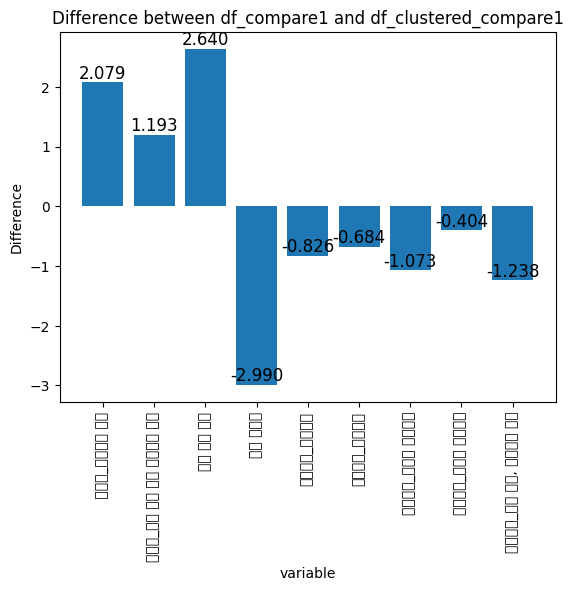

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 데이터 추출
x = result.columns  # x축에 사용할 데이터
y = result.values.flatten()  # y축에 사용할 데이터 (차이값)

# 그래프 그리기
bar = plt.bar(x, y)
plt.xlabel('variable')  # x축 레이블
plt.ylabel('Difference')  # y축 레이블
plt.title('Difference between df_compare1 and df_clustered_compare1')  # 그래프 제목
plt.xticks(rotation=90)  # x축 레이블의 회전 각도 설정

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % height, ha='center', va='bottom', size=12)

plt.show()

